# Лабораторная работа 1

**Жуковой Анны 6302-020302D**

**Вариант 4**

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

**Вариант 4: задания 1 и 3 на наборе данных MNIST**

## 1. Классификация данных методом k ближайших соседей ( kNN)

Классификатор методом ближайщих соседей возьмет тестовое изображение и сравнит его с каждым из обучающий выборки, предсказанным классом будет тот, к которому ближе всего расположено изображение.

В случае с цифрами можно заметить, что все изображения довольно похожи в отличие от того же набора CIFAR-10.

Два изображения будут представлены сначала в виде матриц, затем в виде конкотенированных толбцов.

Сравниваться они будет по метрике евклидова расстояния:

  $∑\sqrt{i(test)^2-i(train)^2}$


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST
sklearn.datasets import load_digits
digits = load_digits()

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train,X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (1437, 64)
Training labels shape:  (1437,)
Test data shape:  (360, 64)
Test labels shape:  (360,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



In [7]:
classes = [i for i in range(10)]
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Figure size 72x108 with 0 Axes>

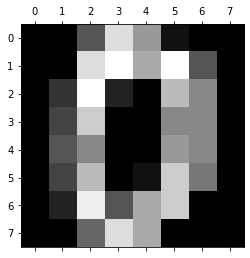

<Figure size 72x108 with 0 Axes>

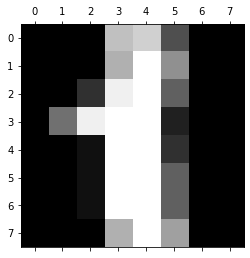

<Figure size 72x108 with 0 Axes>

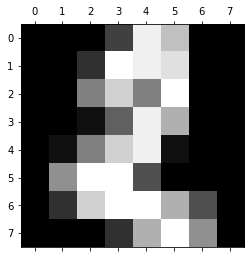

<Figure size 72x108 with 0 Axes>

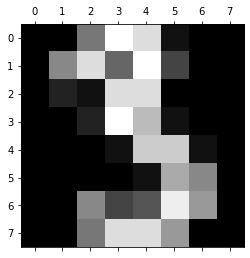

<Figure size 72x108 with 0 Axes>

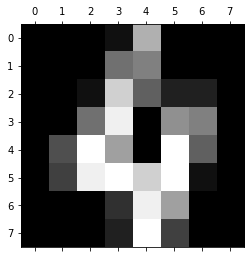

<Figure size 72x108 with 0 Axes>

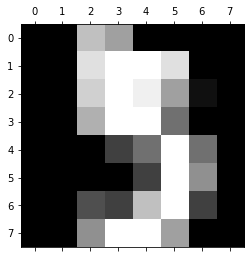

<Figure size 72x108 with 0 Axes>

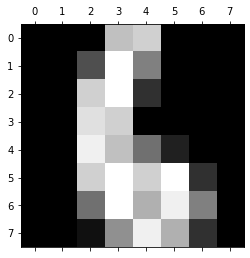

<Figure size 72x108 with 0 Axes>

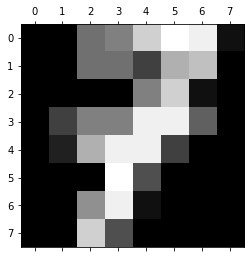

<Figure size 72x108 with 0 Axes>

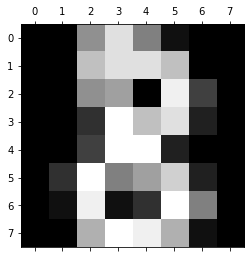

<Figure size 72x108 with 0 Axes>

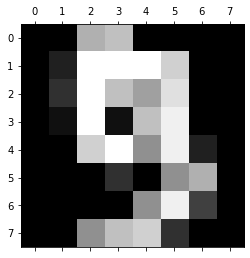

<Figure size 72x108 with 0 Axes>

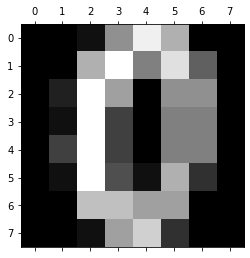

<Figure size 72x108 with 0 Axes>

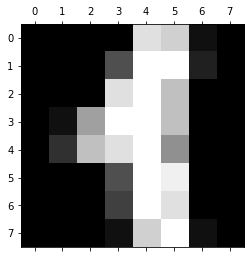

<Figure size 72x108 with 0 Axes>

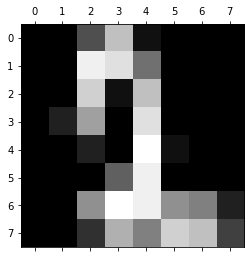

<Figure size 72x108 with 0 Axes>

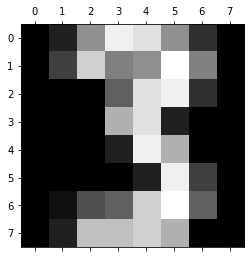

<Figure size 72x108 with 0 Axes>

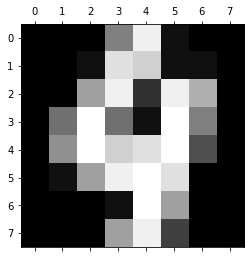

<Figure size 72x108 with 0 Axes>

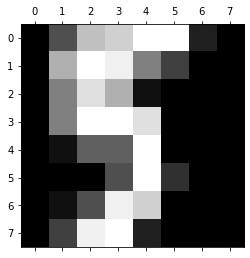

<Figure size 72x108 with 0 Axes>

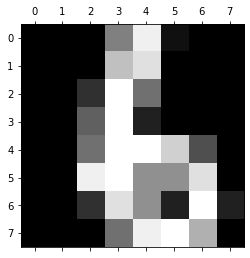

<Figure size 72x108 with 0 Axes>

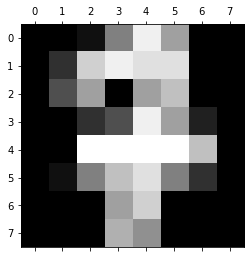

<Figure size 72x108 with 0 Axes>

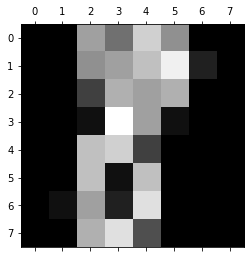

<Figure size 72x108 with 0 Axes>

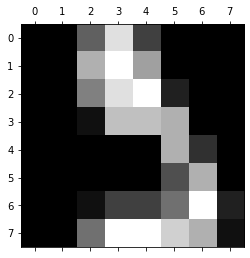

In [8]:
plt.rcParams["figure.figsize"] = (1,1.5)
for i in range(20):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print( X_train.shape, X_test.shape, y_train.shape)

(1437, 64) (360, 64) (1437,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [10]:
from scripts.classifiers import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [11]:
y_test_pred = classifier.predict(X_test, num_loops=1)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.


In [12]:
dists = classifier.compute_distances_two_loops(X_test)
dists.shape

(360, 1437)

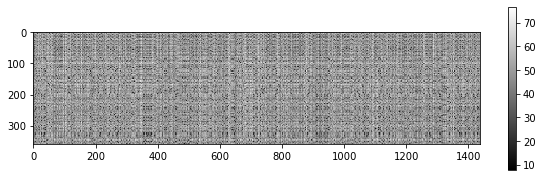

In [36]:
plt.rcParams["figure.figsize"] = (10,3)
plt.imshow(dists, interpolation='none')
plt.colorbar()
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [14]:
num_test = y_test_pred.shape[0]
num_test

360

In [15]:
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ('Корректно %d / %d => точность: %f' % (num_correct, num_test, accuracy))

Корректно 354 / 360 => точность: 0.983333


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [16]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []
    for fold in range(0, len(y_train_folds)):
        fold_train_X = X_train_folds[:]
        fold_train_y = y_train_folds[:]

        fold_test_X = fold_train_X[fold]
        fold_test_y = fold_train_y[fold]
        fold_train_X = np.vstack(fold_train_X[0:fold]+fold_train_X[fold+1:num_folds])
        fold_train_y = np.hstack(fold_train_y[0:fold]+fold_train_y[fold+1:num_folds])
        
        classifier = KNearestNeighbor()
        classifier.train(fold_train_X, fold_train_y)
        
        fold_test_y_pred = classifier.predict(fold_test_X, k=k)
        accuracy = float(np.sum(fold_test_y_pred == fold_test_y)) / len(fold_test_y_pred)
        k_to_accuracies[k].append(accuracy)
        
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.993056
k = 1, accuracy = 0.975694
k = 1, accuracy = 0.993031
k = 1, accuracy = 0.982578
k = 1, accuracy = 0.993031
k = 3, accuracy = 0.989583
k = 3, accuracy = 0.982639
k = 3, accuracy = 0.986063
k = 3, accuracy = 0.982578
k = 3, accuracy = 0.993031
k = 5, accuracy = 0.989583
k = 5, accuracy = 0.979167
k = 5, accuracy = 0.982578
k = 5, accuracy = 0.975610
k = 5, accuracy = 0.989547
k = 8, accuracy = 0.993056
k = 8, accuracy = 0.975694
k = 8, accuracy = 0.982578
k = 8, accuracy = 0.975610
k = 8, accuracy = 0.979094
k = 10, accuracy = 0.993056
k = 10, accuracy = 0.968750
k = 10, accuracy = 0.975610
k = 10, accuracy = 0.965157
k = 10, accuracy = 0.982578
k = 12, accuracy = 0.989583
k = 12, accuracy = 0.968750
k = 12, accuracy = 0.982578
k = 12, accuracy = 0.958188
k = 12, accuracy = 0.972125
k = 15, accuracy = 0.979167
k = 15, accuracy = 0.968750
k = 15, accuracy = 0.979094
k = 15, accuracy = 0.947735
k = 15, accuracy = 0.972125
k = 20, accuracy = 0.968750
k = 20, accu

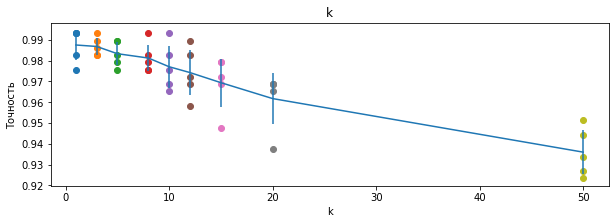

In [17]:
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('k')
plt.xlabel('k')
plt.ylabel('Точность')
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


Лучшее значение параметра k = 1


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [18]:
best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
num_correct, num_test, accuracy

(354, 360, 0.9833333333333333)

1.11 Сделайте выводы по результатам 1 части задания.

Так как MNIST простой набор данных состоящий из цифр в оттенках серего подобный подход дает высокий показатель точности, что невозможно было бы наблюдать на цветных и более сложных изображениях

## 3.  Построение softmax-классификатора

Softmax-классификатор возвращает вероятности того, что объект принадлежит классу и интерпритируем с точки зрения теории вероятности. 
Предсказанное значение вычисляется через $f(x_i;W)=Wx_i$, но теперь интерпретируется как логистические вероятности для каждого класса.

Функция потерь вычиляется как:
$L_i=−log(e^{f_{y_i}}/∑_j e^{f_j})$ или $L_i = −f_{y_i} + log(∑_j e^{f_j})$

Для всего датасета $L = mean(L_i)+R(W)$, где R(W) - регулялизация.
Функция $f_j(z)=e^{z_j}/(∑_ke^{z_k})$ softmax

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [19]:
X_train,X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=2017)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1, random_state=2017)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print( X_train.shape, X_test.shape, y_train.shape)

(1293, 64) (360, 64) (1293,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [21]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])

X_train -= mean_image
X_dev -= mean_image
X_test -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape, X_dev.shape, X_test.shape)

[0.00000000e+00 2.70688322e-01 5.13302398e+00 1.17486466e+01
 1.18399072e+01 5.73936582e+00 1.35112142e+00 1.41531323e-01
 6.96055684e-03 1.87780356e+00]
(1293, 65) (144, 65) (360, 65)


3.4 Реализуйте функции в classifiers/softmax.py




In [22]:
X_dev.shape

(144, 65)

In [23]:
y_dev.shape

(144,)

In [24]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(X_dev.shape[1], 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.301734
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [25]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.027494 analytic: -0.027494, relative error: 1.181407e-09
numerical: 0.540981 analytic: 0.540981, relative error: 1.549873e-10
numerical: 0.000056 analytic: 0.000056, relative error: 4.232343e-07
numerical: -0.371134 analytic: -0.371134, relative error: 9.288745e-11
numerical: 0.558618 analytic: 0.558618, relative error: 6.241085e-11
numerical: -0.295373 analytic: -0.295373, relative error: 1.256820e-10
numerical: -0.595448 analytic: -0.595448, relative error: 6.882829e-11
numerical: 0.026373 analytic: 0.026373, relative error: 1.914120e-09
numerical: -0.000024 analytic: -0.000024, relative error: 9.606394e-08
numerical: 0.602895 analytic: 0.602895, relative error: 4.429696e-11
numerical: -0.000808 analytic: 0.001719, relative error: 1.000000e+00
numerical: -0.088977 analytic: -0.096306, relative error: 3.955960e-02
numerical: 0.258696 analytic: 0.247788, relative error: 2.153734e-02
numerical: 0.061862 analytic: 0.071907, relative error: 7.509251e-02
numerical: 0.444604 a

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [26]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.301734e+00 computed in 0.043018s
vectorized loss: 2.301734e+00 computed in 0.000998s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [27]:
X_train.shape[0], y_train.shape

(1293, (1293,))

In [28]:
from scripts.classifiers import Softmax
sm = Softmax()
tic = time.time()
loss_hist = sm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 15.942985
iteration 100 / 1500: loss 7.310546
iteration 200 / 1500: loss 4.138838
iteration 300 / 1500: loss 2.976408
iteration 400 / 1500: loss 2.549319
iteration 500 / 1500: loss 2.393002
iteration 600 / 1500: loss 2.335570
iteration 700 / 1500: loss 2.314188
iteration 800 / 1500: loss 2.306561
iteration 900 / 1500: loss 2.303696
iteration 1000 / 1500: loss 2.302683
iteration 1100 / 1500: loss 2.302326
iteration 1200 / 1500: loss 2.302143
iteration 1300 / 1500: loss 2.302102
iteration 1400 / 1500: loss 2.302110
That took 0.988074s


In [29]:
y_train_pred = sm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = sm.predict(X_dev)
print('validation accuracy: %f' % (np.mean(y_dev == y_val_pred), ))

training accuracy: 0.856922
validation accuracy: 0.881944


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [30]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [31]:
results = {}
best_val = -1
best_softmax = None
best_lr = -1;
best_r = -1;

In [32]:
def compute_accuracy(y, y_pred):
    return np.mean(y == y_pred)


for lr in learning_rates:
    for reg in regularization_strengths:
        print( "lr: %.7f, reg: %.1f" %(lr, reg))
        model = Softmax()
        model.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=1500, verbose=False)

        train_accuracy = compute_accuracy(y_train, model.predict(X_train))
        val_accuracy = compute_accuracy(y_dev, model.predict(X_dev))
        print ('train accuracy: %.4f' %train_accuracy)
        print ('validation accuracy: %.4f' %val_accuracy)

        results[(lr, reg)] = (train_accuracy, val_accuracy)

        if val_accuracy > best_val:
            best_lr = lr
            best_r = reg
            best_val = val_accuracy
            best_softmax = model

lr: 0.0000001, reg: 25000.0
train accuracy: 0.8592
validation accuracy: 0.8611
lr: 0.0000001, reg: 50000.0
train accuracy: 0.8577
validation accuracy: 0.8750
lr: 0.0000500, reg: 25000.0


C:\Users\Dell\Desktop\3 курс\СИИ\Zhuk_LR1_DL_V4\scripts\classifiers\softmax.py:93: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W*W)
C:\Users\Dell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Dell\Desktop\3 курс\СИИ\Zhuk_LR1_DL_V4\scripts\classifiers\softmax.py:93: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W*W)


train accuracy: 0.1121
validation accuracy: 0.1389
lr: 0.0000500, reg: 50000.0


C:\Users\Dell\Desktop\3 курс\СИИ\Zhuk_LR1_DL_V4\scripts\classifiers\softmax.py:101: RuntimeWarning: overflow encountered in multiply
  dW += 2 * reg * W
C:\Users\Dell\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


train accuracy: 0.0998
validation accuracy: 0.1042


In [33]:
best_lr, best_r

(1e-07, 50000.0)

In [35]:
model = Softmax()
model.train(X_train, y_train, learning_rate=1e-7, reg=5e4, num_iters=1500, verbose=False)
y_test_pred = model.predict(X_test)
compute_accuracy(y_test, y_test_pred)

0.8888888888888888

3.10 Сделайте выводы по третьей части задания

Softmax выдает хорошие результаты, но хуже чем knn. Это происодит поскольку шаблоны реализуемые softmax не отличаются достаточно точностью. 

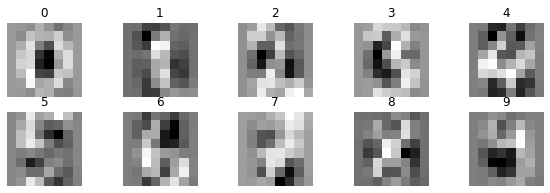

In [37]:
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(8, 8, 10)
w_min, w_max = np.min(w), np.max(w)
classes = [i for i in range(0, 10)]
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])